# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print(cities)
        
# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# create list to hold data
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []
dt = []

counter = 0

# loop through cities to get weather data
for city in cities:
    
    counter += 1
    
    try:   
        # get weather data
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        print(f"Processing Record {counter} | The city name is {city}")
    
    except:
        print(f"City not found: {city}  Skipping ...")

City not found: meyungs  Skipping ...
Processing Record 2 | The city name is champerico
Processing Record 3 | The city name is tiksi
Processing Record 4 | The city name is hilo
Processing Record 5 | The city name is port alfred
Processing Record 6 | The city name is tuktoyaktuk
Processing Record 7 | The city name is lorengau
Processing Record 8 | The city name is georgetown
Processing Record 9 | The city name is el coyote
Processing Record 10 | The city name is tual
Processing Record 11 | The city name is ribeira grande
Processing Record 12 | The city name is radhanpur
Processing Record 13 | The city name is den helder
Processing Record 14 | The city name is vaini
Processing Record 15 | The city name is korla
Processing Record 16 | The city name is punta arenas
City not found: taolanaro  Skipping ...
Processing Record 18 | The city name is bluff
Processing Record 19 | The city name is upernavik
Processing Record 20 | The city name is carnarvon
Processing Record 21 | The city name is br

Processing Record 169 | The city name is mahebourg
Processing Record 170 | The city name is vilyuysk
City not found: tidore  Skipping ...
Processing Record 172 | The city name is zhigansk
Processing Record 173 | The city name is verkhniye tatyshly
Processing Record 174 | The city name is waipawa
City not found: grand centre  Skipping ...
Processing Record 176 | The city name is muros
Processing Record 177 | The city name is port hedland
Processing Record 178 | The city name is namibe
Processing Record 179 | The city name is yumen
Processing Record 180 | The city name is lompoc
City not found: amderma  Skipping ...
Processing Record 182 | The city name is ulladulla
City not found: sindand  Skipping ...
City not found: kamenskoye  Skipping ...
Processing Record 185 | The city name is yancheng
Processing Record 186 | The city name is anloga
Processing Record 187 | The city name is sao gabriel da cachoeira
Processing Record 188 | The city name is saskylakh
Processing Record 189 | The city 

Processing Record 333 | The city name is lagoa
Processing Record 334 | The city name is baiao
Processing Record 335 | The city name is ahipara
Processing Record 336 | The city name is chumikan
Processing Record 337 | The city name is ronda
Processing Record 338 | The city name is touros
Processing Record 339 | The city name is hay river
Processing Record 340 | The city name is narsaq
Processing Record 341 | The city name is san jose del guaviare
Processing Record 342 | The city name is luwuk
Processing Record 343 | The city name is lodja
Processing Record 344 | The city name is nador
City not found: kebemer  Skipping ...
Processing Record 346 | The city name is sohag
Processing Record 347 | The city name is prince rupert
Processing Record 348 | The city name is aars
Processing Record 349 | The city name is nemuro
Processing Record 350 | The city name is alofi
Processing Record 351 | The city name is landsberg
Processing Record 352 | The city name is teshie
Processing Record 353 | The c

Processing Record 502 | The city name is sasovo
Processing Record 503 | The city name is hervey bay
Processing Record 504 | The city name is perbal
Processing Record 505 | The city name is gromiljak
Processing Record 506 | The city name is sosua
Processing Record 507 | The city name is hualmay
Processing Record 508 | The city name is huanuni
Processing Record 509 | The city name is urumqi
Processing Record 510 | The city name is mariakani
Processing Record 511 | The city name is alyangula
Processing Record 512 | The city name is shenjiamen
Processing Record 513 | The city name is camacha
Processing Record 514 | The city name is arlit
Processing Record 515 | The city name is shchigry
Processing Record 516 | The city name is lasa
Processing Record 517 | The city name is manaure
Processing Record 518 | The city name is sioux lookout
Processing Record 519 | The city name is walvis bay
Processing Record 520 | The city name is lafiagi
Processing Record 521 | The city name is maragogi
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary from lists
weather_dict = {"City":name,
                "Lat":lat,
                "Lng":lon,
                "Max_Temp":temp_max,
                "Humidity":humidity,
                "Cloudiness":clouds,
                "Wind_Speed":speed,
                "Country":country,
                "Date":dt}

In [6]:
# create a data frame using the dictionary
city_data = pd.DataFrame(weather_dict)
city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Champerico,14.30,-91.92,86.00,70,20,6.93,GT,1595869190
1,Tiksi,71.69,128.87,40.82,83,99,6.08,RU,1595868760
2,Hilo,19.73,-155.09,75.20,88,90,3.36,US,1595868757
3,Port Alfred,-33.59,26.89,57.81,68,0,14.18,ZA,1595868765
4,Tuktoyaktuk,69.45,-133.04,62.60,72,40,8.05,CA,1595868748
...,...,...,...,...,...,...,...,...,...
544,Pahrump,36.21,-115.98,98.01,18,7,1.01,US,1595869238
545,Gunjur,13.20,-16.73,80.15,82,83,11.90,GM,1595869249
546,Najrān,17.49,44.13,89.60,35,75,10.29,SA,1595869249
547,Atbasar,51.80,68.33,61.88,75,78,11.16,KZ,1595869249


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# check if cities have max humidity > 100
city_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.454645,15.401894,72.051348,68.134791,52.078324,7.726193,1.595869e+09
std,32.140162,87.122490,14.840704,21.225416,37.509114,5.357376,2.270777e+02
min,-54.800000,-175.200000,32.000000,4.000000,0.000000,0.160000,1.595868e+09
25%,-3.350000,-62.400000,61.000000,56.000000,13.000000,3.360000,1.595869e+09
50%,22.930000,19.230000,73.990000,74.000000,57.000000,6.640000,1.595869e+09
75%,47.670000,88.400000,82.400000,83.000000,90.000000,10.450000,1.595869e+09
max,78.220000,179.320000,112.710000,100.000000,100.000000,31.090000,1.595869e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
indicies = city_data[city_data['Humidity']>100].index
indicies

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(indicies,inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Champerico,14.30,-91.92,86.00,70,20,6.93,GT,1595869190
1,Tiksi,71.69,128.87,40.82,83,99,6.08,RU,1595868760
2,Hilo,19.73,-155.09,75.20,88,90,3.36,US,1595868757
3,Port Alfred,-33.59,26.89,57.81,68,0,14.18,ZA,1595868765
4,Tuktoyaktuk,69.45,-133.04,62.60,72,40,8.05,CA,1595868748


In [10]:
# Extract relevant fields from the data frame
lats = clean_city_data['Lat']
maxtemp = clean_city_data['Max_Temp']
hum = clean_city_data['Humidity']
cloud = clean_city_data['Cloudiness']
wind = clean_city_data['Wind_Speed']

# Export the City_Data into a csv
clean_city_data.to_csv(r'output_data\clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
plot_date = date.today().strftime('%m/%d/%Y')
#print(f'Plotted {plot_date}')

## Latitude vs. Temperature Plot

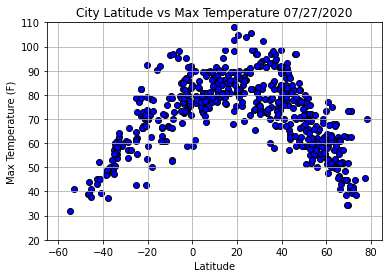

In [12]:
# create a Scatter Plot for temperature vs latitude
plt.scatter(lats, maxtemp, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {plot_date}")
plt.xlim(-65,85) # set the upper and lower limits of our x axis
plt.ylim(20,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

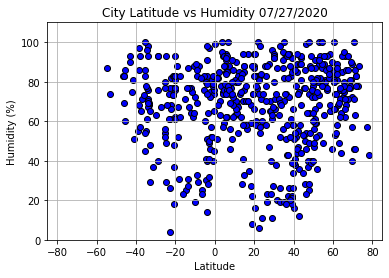

In [13]:
# create a Scatter Plot for humidity vs latitude
plt.scatter(lats, hum, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

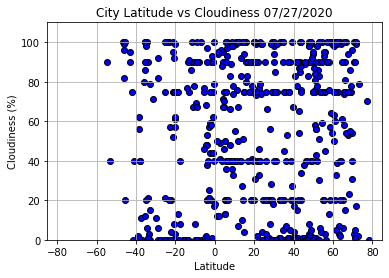

In [14]:
# create a Scatter Plot for cloudiness vs latitude
plt.scatter(lats, clouds, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

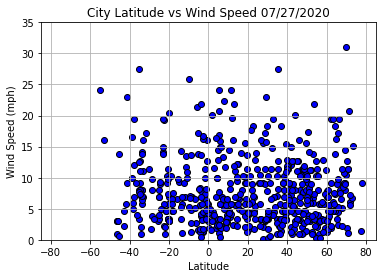

In [15]:
# create a Scatter Plot for wind speed vs latitude
plt.scatter(lats, wind, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,35) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames

In [18]:
north_data = clean_city_data[clean_city_data['Lat']>=0]
north_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Champerico,14.30,-91.92,86.00,70,20,6.93,GT,1595869190
1,Tiksi,71.69,128.87,40.82,83,99,6.08,RU,1595868760
2,Hilo,19.73,-155.09,75.20,88,90,3.36,US,1595868757
4,Tuktoyaktuk,69.45,-133.04,62.60,72,40,8.05,CA,1595868748
6,George Town,5.41,100.34,78.80,94,20,1.12,MY,1595868764


In [19]:
south_data = clean_city_data[clean_city_data['Lat']<0]
south_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
3,Port Alfred,-33.59,26.89,57.81,68,0,14.18,ZA,1595868765
5,Lorengau,-2.02,147.27,79.90,80,90,4.05,PG,1595868802
8,Tual,-5.67,132.75,79.32,82,77,21.43,ID,1595869191
12,Vaini,-21.20,-175.20,69.80,77,75,10.29,TO,1595868749
14,Punta Arenas,-53.15,-70.92,41.00,74,40,16.11,CL,1595868670


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.6583


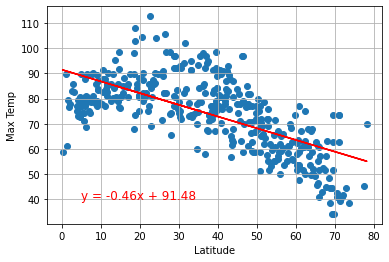

In [20]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Northern Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.8089


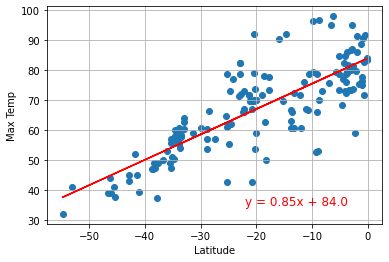

In [21]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Southern Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.0008


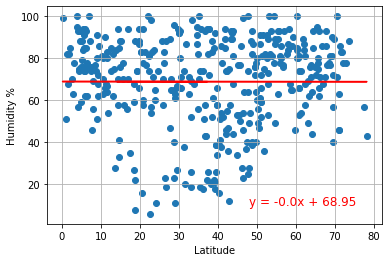

In [22]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Northern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.2115


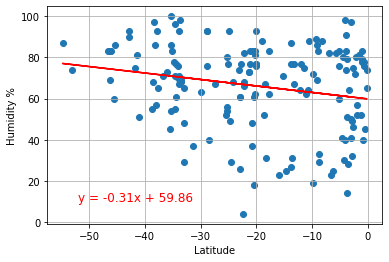

In [23]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Southern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.0443


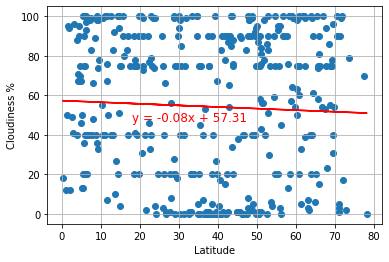

In [26]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,47),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Northern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0065


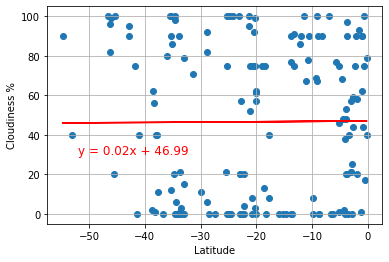

In [28]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Southern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.0012


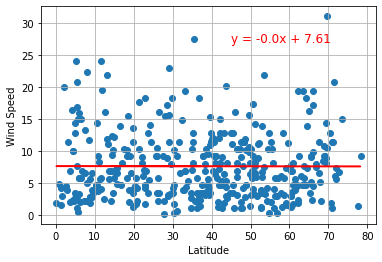

In [29]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Wind_Speed']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Northern wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.2115


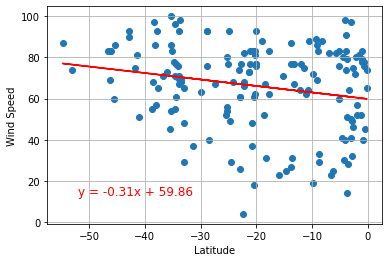

In [30]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,13),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Southern wind Speed vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# The End